In [1]:
# import statements
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as sp

In [2]:
import matplotlib
import matplotlib.font_manager as fm
import os
fpath = '/Library/Fonts/Myriad-Pro_31655.ttf'
prop = fm.FontProperties(fname=fpath)
fname = os.path.split(fpath)[1]
axis_font = {'fontname':fname, 'fontproperties':prop}

In [3]:
# import grad ascent seqs
data_dir = 'gradient_ascent_sequences/'
file_name = '4f_worst_toeholds_optimized.csv'
data_df = pd.read_csv(data_dir + file_name,sep=',')
print(data_df.head(5))

   Unnamed: 0                                   NEW_fixed_switch  \
0           4  TTAATTCATAGATGCCCTACTTCCTCCTCAAACAGAGGAGATGAGG...   
1           7  CGCCATAAAAAATGTCCGGCTATCACTTCAAACAGAGGAGATGAAG...   
2          14  CGTCATATAAATATTACATTGTTGATGATAAACAGAGGAGATATCA...   
3          19  TTCATTATTATATGCTGCTCTTCCCCTCCAAACAGAGGAGATGGAG...   
4          20  TTCATTATTATATGCTATTCCTCGTCTCCAAACAGAGGAGATGGAG...   

   NEW_onoff_preds  experimental_onoff_value  \
0         0.541989                 -1.000000   
1         0.653107                 -1.000000   
2         0.579755                 -0.991651   
3         0.513798                 -0.981535   
4         0.726605                 -0.973708   

                                          new_switch old_predicted_onoff  \
0  TTAATTCATAGATGCCCTACTTCCTCCTCAAACAGAGGAGAAGAGT...        [0.09204182]   
1  CGCCATAAAAAATGTCCGGCTATCACTTCAAACAGAGGAGATGAGG...        [0.06403881]   
2  CGTCATATAAATATTACATTGTTGATGATAAACAGAGGAGATGACG...        [0.02951961]  

In [4]:
old_switches = list(data_df['old_switches'])
new_switches = list(data_df['NEW_fixed_switch'])

old_onoff_value = data_df['experimental_onoff_value']
old_onoff_value = [x for x in old_onoff_value]

new_onoff_value = data_df['NEW_onoff_preds']
new_onoff_value = [x for x in new_onoff_value]

In [5]:
# do some string processing to get in the right format
one_weird = data_df['old_predicted_onoff']
def get_vals_from_array_string(one_weird):
    s = str(one_weird)
    one_weird = s[s.find("['")+2:s.find("]'")]
    one_weird = one_weird.split(" ")
    one_weird = [float(x) for x in one_weird if x != ""]
    return one_weird

pred_old_onoff_value = data_df['old_predicted_onoff']
pred_old_onoff_value = [get_vals_from_array_string(x)[0] for x in pred_old_onoff_value]

In [6]:
df_with_vals = pd.DataFrame([pred_old_onoff_value, new_onoff_value])
df_with_vals = df_with_vals.transpose()
df_with_vals.columns = ['old_onoff', 'new_onoff']
#df_with_vals.to_csv('cleaned_csvs/4f_old_predicted_and_new_onoffs.csv')

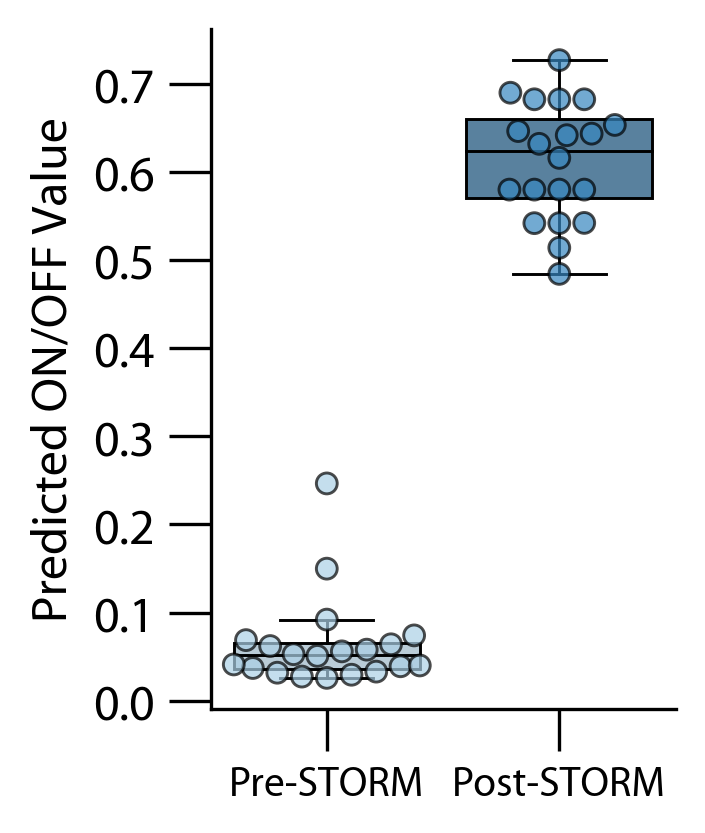

MannwhitneyuResult(statistic=0.0, pvalue=3.32659675084765e-08)

In [7]:
# first make a boxplot of the old onoff vs new onoff
blue = '#407DCF'
grey = 'lightgray'
width = 0.25

# thanks claire!! https://cduvallet.github.io/posts/2018/03/boxplots-in-python
boxprops = {'edgecolor': 'k'}
lineprops = {'color': 'k'}
kwargs = {'boxprops': boxprops, 'medianprops': lineprops,  'whiskerprops': lineprops, 'capprops': lineprops}

fig, ax = plt.subplots(figsize = (2, 3), dpi = 300, ncols=1, sharey=True)
data = pd.concat([pd.DataFrame(pred_old_onoff_value, columns = ['a']), pd.DataFrame(new_onoff_value, columns = ['b'])], axis=1)
ax = sns.boxplot(data=data, showfliers = False, linewidth =0.7, saturation = 0.5, 
                 palette = "Blues", **kwargs)
ax = sns.swarmplot(data=data, color=".25", size = 5, palette = "Blues", 
                   linewidth = 0.7, alpha = 0.7, edgecolor = 'black')
ax.tick_params(length = 10)
ax.set_ylabel('Predicted ON/OFF Value', **axis_font, fontsize = 12)
ax.set_xticklabels(['Pre-STORM', 'Post-STORM'], **axis_font, fontsize = 10)
ax.set_yticklabels([np.round(x, 2) for x in ax.get_yticks()], **axis_font, fontsize = 12)

ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

sp.mannwhitneyu(pred_old_onoff_value, new_onoff_value)